# Guide to manage missing data

*This article is part of our series about how different types of data scientists build similar models differently. No human is the same and therefore also no data scientist is the same. And the circumstances under which a data challenge needs to be handled change constantly. For these reasons, different approaches can and will be used to complete the task at hand. In our series we will explore the four different approaches of our data scientists - Meta Oric, Aki Razzi, Andy Stand, and Eqaan Librium. They are presented with the task to build a model to predict whether employees of a company - STARDATAPEPS - will look for a new job or not. Based on their distinct profiles discussed in the <a href="https://www.theanalyticslab.nl/no-data-scientist-is-the-same-introducing-our-data-science-rock-stars" target="_blank" rel="noopener noreferrer">first blog</a> you can already imagine that their approaches will be quite different.*

*In this article we will first discuss Andy Stand's approach. Let me first remind you of who Andy is:* 

### Andy Stand : *'Understand is what we do'* 

!['Andy Stand'](https://bhciaaablob.blob.core.windows.net/featureengineeringreeks/characters/Andy%20Stand_400px.png)

Andy believes everything should be explainable. He is happy to sacrifice a bit of accuracy in order to achieve the most clear and understandable solution. Simple regressions and decision trees are the most utilised tools from his toolbox. Also in handling missing values he will choose the methods that he can explain easily.

*Secondly we will see Aki's approach for managing missing data.* 

### Aki Razzi: 'Accuracy is what truly matters'

!['Aki Razzi'](https://bhciaaablob.blob.core.windows.net/featureengineeringreeks/characters/Aki%20Razzi_400px.png)

Aki always wants to achieve the highest possible performance. Time and resources do not matter that much to her. She does not care whether a technique is easy to explain or not.

In the <a href="https://www.theanalyticslab.nl/no-data-scientist-is-the-same-beat-dirty-data" target="_blank" rel="noopener noreferrer">blog beat dirty data</a> we saw several challenges which data scientists face when making a predictive model.
Missing data is one of the most common challenges. In this article we will discuss and compare several methods to handle these missings. Which method you choose, depends on the business goal, available time, and your <a href="https://www.theanalyticslab.nl/no-data-scientist-is-the-same-introducing-our-data-science-rock-stars" target="_blank" rel="noopener noreferrer">personal preference</a>…

### What is the problem with missing data?

Missings in categorical and numerical variables should be considered separately. Unknown values can be grouped to form a separate category for categorical variables. You could for example make a dummy variable or do something else with it, see our <a href="https://www.theanalyticslab.nl/no-data-scientist-is-the-same-the-case-of-high-cardinality-kerfuffles" target="_blank" rel="noopener noreferrer">blog on categorical variables</a>.

You cannot do calculations with missing values. Formula-based algorithms like regression or neural networks cannot handle records with missing values. These algorithms need complete cases, without any missing values in any variable. Note that some algorithms like decision tree or gradient boosting can handle missing values. Therefore these algoritms need less data preparation and therefore could be faster to implement. But sometimes you want or need to use regression analysis or some other formula based algorithms that cannot cope with the missings. 

Why not throw cases that have missing values away? This is usually NOT a good idea for several reasons:
1. Maybe it does not sound very bad when each separate variable just has 1% missing values. But when you have 100 inputs with 1% missings randomly spread, then only 37% of the data are complete cases (0.99 to the power of 100). You might have too few data left to draw statistically sound conclusions and build a model on it. So only when they are very rare you could choose to leave missings out. 
1. And there is another reason not to throw columns or records with missings away. The missingness itself could be valuable information. Often the missingsness is not random, but there is a specific reason for it. Therefore missingness can be related to other variables and even the target. Leaving the records out will lead to biased model. 
1. You don't want to loose information.

So throwing missings away could lead to statistically unstable, biased and unreliable preditive models. This forces you to do something about these missing values.

###What to do with missing values? 

First of all, you can try to find out what caused the missing values in a column or record. Maybe you could fix the problem, improve the proces for future records and/or better know how to impute the value (=replace by a non-missing).

Before replacing the missing values: make **indicator variables** for each variable! These variable are 1 when there was a missing value and 0 if not. In this way the information about the missingness itself is not thrown away. This could be crucial information to predict your target. For example: a missing salary could be predictive for defaulting on a credit loan yes or no. 

There are **three imputation techniques to replace missing values**:

#####1. Impute all missings in a column with the same value. 
This could be the mean, median, most frequent value of the variable or a value that makes sense businesswise. 
This is also called 'univariate imputation', since it is based on only one variable.

Explore the distributions of your numerical variables and then impute with: 

|Imputation value | Reason to use it|
|-----------------|-----------------------------------------------------------------|
|***Mean*** | when a numerical variable has a symmetric distribution or at least not too skewed |
| ***Median*** | when there is a high skewness or outliers |
| ***Most frequent value*** | if a variable is discrete (not continuous) and when it makes common sense | 
| ***Constant*** | like a zero, based on business knowledge or common sense |

Multivariate imputation uses more than one variable. The missing value is estimated based on all other features. Examples:

##### 2. Replace the missings with a value per group. 

The could be done in two ways:
1. This could be based on another (categorical) variable. For example you can replace missing salary based on the median or mean value per age group. 
2. Another way is to use the ***KNN - K Nearest Neighbours*** method. Each sample’s missing values are imputed using the mean value from k nearest neighbors found in the training set. 

##### 3. Predict the missing value based on other variables.

An even more sophisticated approach is to model the feature with missing values as a function of other features, and use that estimate for imputation. 
A way of doing this, is by ***iterative imputation*** or ***MICE***: Multiple Imputation by Chained Equations. 
At every step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion, until the algoritm converges or the maximum number of iterations has been reached. In this article only the IterativeImputer of scikit-learn is used, but there are other methods like DecisionTreeRegressor, ExtraTreesRegressor (similar to missForest in R) or KNeighborsRegressor.

Question is: what method would you choose? Besides performance, your choice can be impacted by how interpretable you would like your model to be. Our character Andy wants to only use techniques that he can easily explain to the business. Thus he will stay away from options two and three. On the other hand Aki would choose a black-box technique if it results in a better predictive model.

Also: the choice could differ per dataset, there is no one size fits all. Let's see what gives the best results on our example dataset!

**Overview of the how to handle missing values** ([source](https://www.kaggle.com/parulpandey/a-guide-to-handling-missing-values-in-python))

!['Overview of the how to handle missing values'](https://bhciaaablob.blob.core.windows.net/featureengineeringreeks/characters/missings.png)

### Initialization, import and prepare the data
- First Andy installs the necessary packages to be able to do some data exploration and handle the missings with python.
- Next step is to import the data. The dataset contains mostly categorical or ordinal data with missing values. The numerical variables hardly contain any missings. Therefore some of the ordinal variables (with missing values) are recoded as if they are numerical for the purpose of this article. 
- Then Andy makes a list for the numerical variables and categorical variables, because these are handled differently in later steps.  
- Another part of the preparation is to split data in train and test dataset.

In [ ]:
## if necessary, install the latest version of seaborn
# %pip install -U seaborn 

# import necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from scipy.stats import mode
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve

# display full output in Jupyter and DataBricks and not only last result
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"              

import warnings 
warnings.filterwarnings(action= 'ignore')

In [ ]:
### import the dataset ###
df = pd.read_csv('https://bhciaaablob.blob.core.windows.net/featurenegineeringfiles/df_prepared.csv')
df_prep = df.drop(columns=['Unnamed: 0','city', 'experience', 'enrollee_id']) 

### recode some of the categorical variables to numerical for the purpose of this article ###

# making 'company_size'  numerical
print(df_prep['company_size'].value_counts())

cat2val_compsize_dict = { 
  '<10'       :     5, 
  '10/49'     :    30,
  '50-99'     :    75, 
  '100-500'   :   300,
  '500-999'   :   750,
  '1000-4999' :  3000,
  '5000-9999' :  7500,
  '10000+'    : 10000,
  np.nan      : np.nan }

def cat2val_compsize(value): return cat2val_compsize_dict[value]
df_prep['company_size_num'] = df_prep['company_size'].apply(cat2val_compsize)

print(df_prep['company_size_num'].value_counts())

df_prep = df_prep.drop(columns=['company_size']) 


#  making 'last_new_job' numerical
print(df_prep['last_new_job'].value_counts())

cat2val_job_dict = { 
  'never' : 0,
  '1'     : 1, 
  '2'     : 2,
  '3'     : 3, 
  '4'     : 4,
  '>4'    : 5,
  np.nan  : np.nan }

def cat2val_job(value): return cat2val_job_dict[value]
df_prep['last_new_job_num'] = df_prep['last_new_job'].apply(cat2val_job)

print(df_prep['last_new_job_num'].value_counts())

df_prep = df_prep.drop(columns=['last_new_job']) 

# making 'education_level' numerical
print(df_prep['education_level'].value_counts())

cat2val_edu_dict = { 
  'Primary School' : 1,
  'High School'    : 2, 
  'Graduate'       : 3,
  'Masters'        : 4, 
  'Phd'            : 5,
  np.nan           : np.nan }

def cat2val_edu(value): return cat2val_edu_dict[value]
df_prep['education_level_num'] = df_prep['education_level'].apply(cat2val_edu)

print(df_prep['education_level_num'].value_counts())

df_prep = df_prep.drop(columns=['education_level']) 

### make lists of variables types to use later in the analysis ###
categorical_features = df_prep.select_dtypes(exclude="number").columns.tolist()  
categorical_features.remove('city name')                                          # drop city, this variable has too much levels

numeric_features = df_prep.select_dtypes(include="number").columns.tolist()
numeric_features.remove('target')                                                 # target is the dependent variable and not one of the numerical independent/predictor variables

### split the data in a train and test dataset ###

# Define the target vector y
y = df_prep['target']  
X = df_prep.drop(columns=['target']) 

# split X and y into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

50-99 3083
100-500 2571
10000+ 2019
10/49 1471
1000-4999 1328
<10 1308
500-999 877
5000-9999 563
Name: company_size, dtype: int64
75.0 3083
300.0 2571
10000.0 2019
30.0 1471
3000.0 1328
5.0 1308
750.0 877
7500.0 563
Name: company_size_num, dtype: int64
1 8040
>4 3290
2 2900
never 2452
4 1029
3 1024
Name: last_new_job, dtype: int64
1.0 8040
5.0 3290
2.0 2900
0.0 2452
4.0 1029
3.0 1024
Name: last_new_job_num, dtype: int64
Graduate 11598
Masters 4361
High School 2017
Phd 414
Primary School 308
Name: education_level, dtype: int64
3.0 11598
4.0 4361
2.0 2017
5.0 414
1.0 308
Name: education_level_num, dtype: int64

### Explore the data: which variables have missing values?

Andy starts with exploring the data extensively. He knows that this is very important to make a well considered choice in how to deal with the missing values.
One part is to explore distributions with statistics and graphs to see how to replace the missings. How many records contain missings? Which variables contain unknowns? Categorical or numerical variables?  

Based on the statistics and graphs Andy will replace missing values by the median (high skewness), mean (more symmetric), a very frequent value or what makes sense businesswise.

In [ ]:
# basic exploration: what does the dataset look like? Do you see missing values?
X_train.head(20)

Out[4]:

city_development_index 
 gender 
 enrolled_university 
 major_discipline 
 company_type 
 training_hours 
 ind_relevent_experience 
 experience_num 
 city name 
 company_size_num 
 last_new_job_num 
 education_level_num 
 
 
 
 
 13330 
 0.910 
 NaN 
 no_enrollment 
 NaN 
 NaN 
 16 
 0 
 2.0 
 San Diego-Carlsbad CA (Metro) 
 NaN 
 0.0 
 2.0 
 
 
 18074 
 0.897 
 Male 
 no_enrollment 
 STEM 
 Pvt Ltd 
 262 
 1 
 6.0 
 Sioux Falls SD (Metro) 
 3000.0 
 1.0 
 4.0 
 
 
 366 
 0.910 
 Male 
 NaN 
 NaN 
 NaN 
 24 
 0 
 3.0 
 San Diego-Carlsbad CA (Metro) 
 NaN 
 0.0 
 NaN 
 
 
 10662 
 0.910 
 Male 
 no_enrollment 
 NaN 
 NaN 
 35 
 0 
 3.0 
 San Diego-Carlsbad CA (Metro) 
 NaN 
 1.0 
 2.0 
 
 
 13974 
 0.555 
 Male 
 Full time course 
 STEM 
 NaN 
 43 
 1 
 4.0 
 Clarksville TN-KY (Metro) 
 NaN 
 1.0 
 3.0 
 
 
 2199 
 0.897 
 Male 
 no_enrollment 
 STEM 
 Pvt Ltd 
 18 
 1 
 22.0 
 Sioux Falls SD (Metro) 
 750.0 
 2.0 
 4.0 
 
 
 3079 
 0.920 
 Male 
 no_enrollment 
 STEM 
 Pvt Ltd 
 29 
 1 
 6.0 
 Salt Lake City UT (Metro) 
 5.0 
 2.0 
 3.0 
 
 
 13624 
 0.698 
 Male 
 no_enrollment 
 STEM 
 Pvt Ltd 
 122 
 1 
 13.0 
 Worcester MA-CT (Metro) 
 75.0 
 5.0 
 4.0 
 
 
 6712 
 0.487 
 Male 
 no_enrollment 
 STEM 
 NaN 
 52 
 1 
 19.0 
 Vallejo-Fairfield CA (Metro) 
 NaN 
 1.0 
 4.0 
 
 
 10838 
 0.920 
 Male 
 Full time course 
 STEM 
 NaN 
 41 
 1 
 10.0 
 Salt Lake City UT (Metro) 
 NaN 
 2.0 
 3.0 
 
 
 12930 
 0.926 
 Male 
 Full time course 
 NaN 
 NaN 
 79 
 1 
 3.0 
 Boulder CO (Metro) 
 NaN 
 2.0 
 2.0 
 
 
 3016 
 0.895 
 Male 
 no_enrollment 
 STEM 
 Pvt Ltd 
 30 
 1 
 22.0 
 Portland-Vancouver-Hillsboro OR-WA (Metro) 
 10000.0 
 5.0 
 4.0 
 
 
 7793 
 0.743 
 Male 
 no_enrollment 
 STEM 
 NaN 
 23 
 1 
 13.0 
 Miami-Fort Lauderdale-West Palm Beach FL (Metro) 
 NaN 
 1.0 
 5.0 
 
 
 7021 
 0.666 
 Male 
 no_enrollment 
 STEM 
 Pvt Ltd 
 124 
 1 
 2.0 
 Rochester NY (Metro) 
 7500.0 
 1.0 
 3.0 
 
 
 11685 
 0.855 
 Male 
 Part time course 
 STEM 
 Pvt Ltd 
 46 
 0 
 2.0 
 Santa Maria-Santa Barbara CA (Metro) 
 7500.0 
 1.0 
 3.0 
 
 
 9844 
 0.624 
 Male 
 Full time course 
 STEM 
 NaN 
 21 
 0 
 6.0 
 Auburn-Opelika AL (Metro) 
 NaN 
 0.0 
 3.0 
 
 
 17278 
 0.550 
 NaN 
 no_enrollment 
 STEM 
 NaN 
 36 
 1 
 2.0 
 Riverside-San Bernardino-Ontario CA (Metro) 
 5.0 
 1.0 
 4.0 
 
 
 8939 
 0.624 
 NaN 
 Part time course 
 STEM 
 Public Sector 
 54 
 0 
 1.0 
 Auburn-Opelika AL (Metro) 
 5.0 
 NaN 
 4.0 
 
 
 13906 
 0.926 
 NaN 
 no_enrollment 
 STEM 
 Pvt Ltd 
 15 
 1 
 6.0 
 Boulder CO (Metro) 
 5.0 
 1.0 
 4.0 
 
 
 1653 
 0.920 
 Male 
 no_enrollment 
 NaN 
 NaN 
 140 
 0 
 5.0 
 Denver-Aurora-Lakewood CO (Metro) 
 NaN 
 1.0 
 2.0

Andy starts with checking out the number of missings for each variable...

In [ ]:
# which variables have the highest number of missing values?
x = X_train.isna().sum().sort_values(ascending=False).reset_index()
x = x.rename(columns={'index':'name_var',0:'# missings'})

n_records = df_prep.shape[0]
x['% missings']=x['# missings']/n_records
x['% missings'] = x['% missings'].astype(float).map("{:.2%}".format)  

# print the columns with missing values
print(x[x['# missings'] > 0])
print('\n')    

nums_with_miss = [i for i in X_train.columns if X_train[i].isnull().sum()>0]
print('Number of variables with missing values: ',len(nums_with_miss))

name_var # missings % missings
0 company_type 4943 25.80%
1 company_size_num 4779 24.95%
2 gender 3639 18.99%
3 major_discipline 2237 11.68%
4 education_level_num 370 1.93%
5 last_new_job_num 332 1.73%
6 enrolled_university 311 1.62%
7 experience_num 48 0.25%


Number of variables with missing values: 8

### Is there a relation between missingness and the target?

Andy looks at the target distibution of all data and compares it to the distribution of the target when only complete-case records are left (no missing values).
The percentage of data scientists looking for a job is 25% in the original dataset, this is much higher than 16.8% in the dataset with only complete cases. Also the complete cases dataset has less than 50% of the original data left.
Besides the fact that the complete-cases-dataset is much smaller, it is also a biased dataset. Thefore Andy's conclusion is: 'it is better not to leave out missing records'.

In [ ]:
# join X and y back together
Xy_train = X_train.join(y_train)

# drop all records with missing values
Xy_train_drop_all_miss = Xy_train.dropna()

# original dataset has 19.158 records
print('Original train dataset has', len(Xy_train), 'records.')
# after dropping records with missing values, the dataset only has 8.955 records left  
print('Dataset after dropping all rows with missing values has', len(Xy_train_drop_all_miss), 'records.')
print('This is only', round(100*len(Xy_train_drop_all_miss)/len(Xy_train),1), '% of the original dataset.')

print('\n')
print('The original train dataset has ',round(Xy_train['target'].mean()*100,1),'% of data scientists looking for a new job.')
print('The dataset after dropping all rows with missing values has ',round(Xy_train_drop_all_miss['target'].mean()*100,1),'% of data scientists looking for a new job.')  

Original train dataset has 15326 records.
Dataset after dropping all rows with missing values has 7153 records.
This is only 46.7 % of the original dataset.


The original train dataset has 25.0 % of data scientists looking for a new job.
The dataset after dropping all rows with missing values has 16.8 % of data scientists looking for a new job.

### Explore distributions using statistics, histograms and boxplots

The statistics show that 'company_size_num' has large difference between mean and median, also the skewness is larger than 1 (you can also use 2 or 3 as a threshold). 
The histogram and boxplot also show a very skewed distribution for the variable 'company_size_num'. Therefore he decides to impute with the median value instead of the mean.

Based on the statistics, graphs and his business knowledge, he decides to treat missing values for the other variable as follows:
- 'experience_num' is not too skewed, so he imputes with the mean value,
- 'last_new_job_num' can be replaced with a zero, since he knows that a missing value means there was no last job.
- for 'education_level_num' he thinks it makes sense to replace with the most common value: the modus.

In [ ]:
# basic exploration: describe distributions of variables in the dataset
def describe(df):
    return round(pd.concat([df.describe().T, 
                            df.skew().rename('skewness'), 
                            df.isnull().sum().rename('# missings'),
                            df.isnull().mean().rename('% missings').map("{:.2%}".format),
                            df[categorical_features].mode().T.rename(columns={0:'mode'})]
                           ,  axis=1).T,1)

describe(X_train)


Out[81]:

city_development_index 
 training_hours 
 ind_relevent_experience 
 experience_num 
 company_size_num 
 last_new_job_num 
 education_level_num 
 gender 
 enrolled_university 
 major_discipline 
 company_type 
 city name 
 
 
 
 
 count 
 15326.0 
 15326.0 
 15326.0 
 15278.0 
 10547.0 
 14994.0 
 14956.0 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 mean 
 0.829063 
 65.337466 
 0.72191 
 10.294541 
 2292.055561 
 1.99233 
 3.135865 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 std 
 0.123161 
 60.007145 
 0.448072 
 7.043402 
 3670.500882 
 1.672477 
 0.689314 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 min 
 0.448 
 1.0 
 0.0 
 0.0 
 5.0 
 0.0 
 1.0 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 25% 
 0.74 
 23.0 
 0.0 
 4.0 
 75.0 
 1.0 
 3.0 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 50% 
 0.903 
 47.0 
 1.0 
 9.0 
 300.0 
 1.0 
 3.0 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 75% 
 0.92 
 88.0 
 1.0 
 16.0 
 3000.0 
 3.0 
 4.0 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 max 
 0.949 
 336.0 
 1.0 
 22.0 
 10000.0 
 5.0 
 5.0 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 skewness 
 -1.002357 
 1.819601 
 -0.990641 
 0.476445 
 1.40552 
 0.808798 
 -0.099611 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 # missings 
 0 
 0 
 0 
 48 
 4779 
 332 
 370 
 3639 
 311 
 2237 
 4943 
 0 
 
 
 % missings 
 0.00% 
 0.00% 
 0.00% 
 0.31% 
 31.18% 
 2.17% 
 2.41% 
 23.74% 
 2.03% 
 14.60% 
 32.25% 
 0.00% 
 
 
 mode 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 Male 
 no_enrollment 
 STEM 
 Pvt Ltd 
 NaN

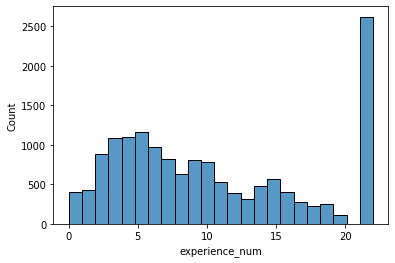

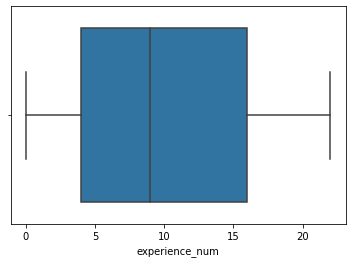

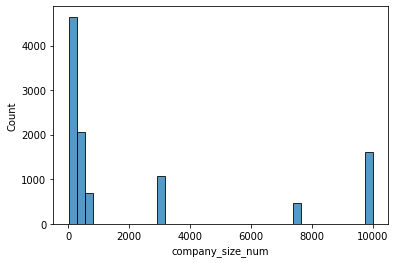

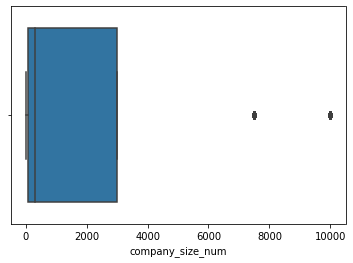

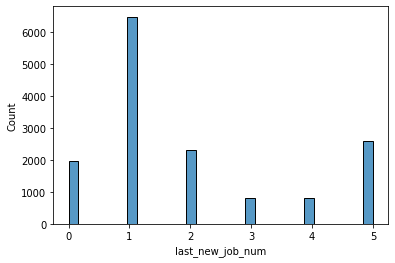

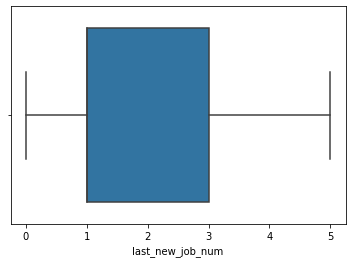

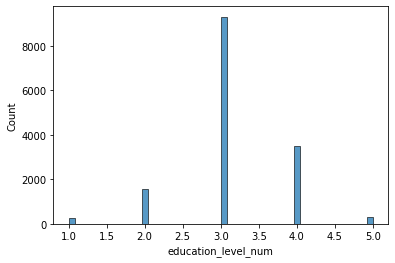

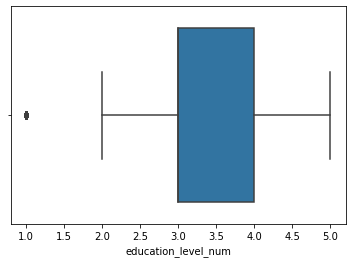

In [ ]:
# plot numerical values with missing values 
# how symmetric or skewed are these variables? Can missings be replaced by the mean or median?
for variable in numeric_features:
   if df_prep[variable].isna().sum() > 0:    # only variables with missing values
      x1 = sns.histplot(X_train,x=variable)
      plt.show(x1)      
      x2 = sns.boxplot(X_train[variable])
      plt.show(x2)  

### Recode categorical variables, including the missing values

Andy chooses to handle missing values as just another category for the categorical variables. Andy uses OnHotEncoding from scikit-learn. Another way to do it would be: pandas.get_dummies. For the difference between these two, see this [blog](https://albertum.medium.com/preprocessing-onehotencoder-vs-pandas-get-dummies-3de1f3d77dcc). If you want to use more sophisticated ways to deal with categorical variables see our <a href="https://www.theanalyticslab.nl/no-data-scientist-is-the-same-the-case-of-high-cardinality-kerfuffles" target="_blank" rel="noopener noreferrer">blog on categorical variables</a>.

In [ ]:
# one-hot encoding for the categorical variables - only keep dummies for categories with more than 100 observations 

# fit and transform onehot-encoding based on the trainingsdataset
one_hot_encode = OneHotEncoder(sparse=False)
one_hot_encode.fit(X_train[categorical_features])
X_train_dummies = pd.DataFrame(one_hot_encode.transform(X_train[categorical_features]))
X_train_dummies.columns = one_hot_encode.get_feature_names(categorical_features)

# only keep the dummy variable for categories that occur more than 100 times (including the category 'nan') 
category_list_keep = [dummy for dummy in X_train_dummies.columns if X_train_dummies[dummy].sum() >= 100]
X_train_dummies = X_train_dummies[category_list_keep]

# apply the onehot-encoding by using transform on the testdataset 
X_test_dummies = pd.DataFrame(one_hot_encode.transform(X_test[categorical_features]))
X_test_dummies.columns = one_hot_encode.get_feature_names(categorical_features)
X_test_dummies = X_test_dummies[category_list_keep]

# One-hot encoding removed the index - with this it is put back! 
X_train_dummies.index = X_train.index 
X_test_dummies.index = X_test.index 

# Printing the resulting dataframe
X_train_dummies

Out[6]: Out[6]:

gender_Female 
 gender_Male 
 gender_Other 
 gender_nan 
 enrolled_university_Full time course 
 enrolled_university_Part time course 
 enrolled_university_no_enrollment 
 enrolled_university_nan 
 major_discipline_Arts 
 major_discipline_Business Degree 
 major_discipline_Humanities 
 major_discipline_No Major 
 major_discipline_Other 
 major_discipline_STEM 
 major_discipline_nan 
 company_type_Early Stage Startup 
 company_type_Funded Startup 
 company_type_NGO 
 company_type_Other 
 company_type_Public Sector 
 company_type_Pvt Ltd 
 company_type_nan 
 
 
 
 
 13330 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 
 
 18074 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 
 
 366 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 
 
 10662 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 
 
 13974 
 0.0 
 1.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 11284 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 
 
 11964 
 0.0 
 1.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 
 
 5390 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 
 
 860 
 0.0 
 0.0 
 0.0 
 1.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 
 
 15795 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 
 
 
 15326 rows × 22 columns

### Create missing indicator variables 

Andy knows that missingness itself can be important information. Therefore, before imputing, he creates 'binary flags' indicating if the value was missing or not. 

This can be done in several ways like with scikit-learn's [SimpleImputer(add_indicator=True)](https://www.youtube.com/watch?v=DKmDJJzayZw). Missing values are imputed and missing indicators are created.
SimpleImputer can do two things in one step and also you can put this in a pipeline with other transformations. For an example of a pipeline, see <a href="https://www.theanalyticslab.nl/no-data-scientist-is-the-same-good-model-by-default-using-xgboost" target="_blank" rel="noopener noreferrer">Meta's blog</a>.

However Andy likes to be more in control. Now he can create indicator variables only for variables with more than 100 missing values. In his experience the indicator variable should have at least 100 '1's to use it statically sound for modelling. Another advantage of not using SimpleImputer is that imputation can be done later on, having the freedom to choose different methods.

In [ ]:
# create a list which numerical variables that have more than x missings 
def list_missing_vars(df, features, x_missings = 100):
    list_vars = []
    for variable in features:
        if df[variable].isna().sum() >= x_missings:
           list_vars.append(variable)
    return list_vars

# for every variable in the list, create indicator variables: 1 if value is missing and 0 if value is not missing
def create_missing_indicators(df, variable_list):
    df_new = pd.DataFrame()  
    for variable in variable_list:
        df_new['miss_'+variable] = df[variable].isnull().astype(int)   
    return df_new
    
# create a list which numerical variables have more than 100 missings values - based on the trainingsdataset
list_indicators_ge100 = list_missing_vars(X_train, numeric_features, 100) 

# create indicator variables for the train 
X_train_miss = create_missing_indicators(X_train, list_indicators_ge100)
# create the same list of indicator variables on the test dataset 
X_test_miss = create_missing_indicators(X_test, list_indicators_ge100)

# Printing the resulting dataframe
X_train_miss

Out[7]:

miss_company_size_num 
 miss_last_new_job_num 
 miss_education_level_num 
 
 
 
 
 13330 
 1 
 0 
 0 
 
 
 18074 
 0 
 0 
 0 
 
 
 366 
 1 
 0 
 1 
 
 
 10662 
 1 
 0 
 0 
 
 
 13974 
 1 
 0 
 0 
 
 
 ... 
 ... 
 ... 
 ... 
 
 
 11284 
 1 
 0 
 0 
 
 
 11964 
 1 
 0 
 0 
 
 
 5390 
 0 
 0 
 0 
 
 
 860 
 1 
 0 
 0 
 
 
 15795 
 0 
 0 
 0 
 
 
 
 15326 rows × 3 columns

### Impute missing values by hand

Andy chooses to do the missing value replacement for each variable seperately (by hand). If you have a lot of variables this can be time consuming. On the other hand: all is in control and can be explained to the business. So this is how Andy likes it.  

Based on the statistics, graphs and his business knowledge, Andy decides to treat missing values per variable as follows:
1. 'experience_num' is not too skewed, so he imputes with the mean value,
2. 'company_size_num' is very skewed, so he replaces with the median value,  
3. 'last_new_job_num' can be replaced with a zero, since he knows that a missing value means there was no last job.
4. for 'education_level_num' he thinks it makes sense to replace with the most common value: the modus.  
5. other variables do not have missing values in the trainingset, but the testdata can have missings. He replaces missing values in the test data by the mean value.

Andy creates a dictionary that contains pairs of the variable names and its replacement values. These replacement values are calculated based on the training dataset. 
In the next step the dictionary is applied on the test data, later on it can be applied on a new dataset.

In [ ]:
# list of variables with missings in the trainingsdataset
nums_with_miss = [i for i in numeric_features if X_train[i].isnull().sum()>0]
#print(nums_with_miss)

# calculate a dictionary of pairs of variable-names and the replacement values - based on the trainingsdataset
dict_replace = {'experience_num'         : X_train['experience_num'].mean(),         
                'company_size_num'       : X_train['company_size_num'].median(),     
                'last_new_job_num'       : 0,                                        
                'education_level_num'    : X_train['education_level_num'].mode()[0],  
                'city_development_index' : X_train['city_development_index'].mean(), 
                'training_hours'         : X_train['training_hours'].mean(),
                'ind_relevent_experience': X_train['ind_relevent_experience'].mean()}

# define a function to replace the missing values with the replacement values in the dictionary 
def impute_values(df, dict_impute):
    df_new = pd.DataFrame()  
    for variablename, value in dict_impute.items():
        df_new[variablename] = df[variablename].fillna(value)
    return df_new 

# replace the missings of the train and test dataset with replacement values of the dictionary 
X_train_miss_imp = impute_values(X_train[numeric_features], dict_replace)  
X_test_miss_imp = impute_values(X_test[numeric_features], dict_replace)  

# Printing the resulting dataframe
X_train_miss_imp

# confirm that there are no missings left in the data
nums_with_miss = [i for i in X_train_miss_imp.columns if X_train_miss_imp[i].isnull().sum()>0]
print('number of missing values: ',len(nums_with_miss))

Out[8]: number of missing values: 0

experience_num 
 company_size_num 
 last_new_job_num 
 education_level_num 
 city_development_index 
 training_hours 
 ind_relevent_experience 
 
 
 
 
 13330 
 2.0 
 300.0 
 0.0 
 2.0 
 0.910 
 16 
 0 
 
 
 18074 
 6.0 
 3000.0 
 1.0 
 4.0 
 0.897 
 262 
 1 
 
 
 366 
 3.0 
 300.0 
 0.0 
 3.0 
 0.910 
 24 
 0 
 
 
 10662 
 3.0 
 300.0 
 1.0 
 2.0 
 0.910 
 35 
 0 
 
 
 13974 
 4.0 
 300.0 
 1.0 
 3.0 
 0.555 
 43 
 1 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 11284 
 22.0 
 300.0 
 5.0 
 3.0 
 0.920 
 25 
 0 
 
 
 11964 
 4.0 
 300.0 
 0.0 
 2.0 
 0.866 
 122 
 0 
 
 
 5390 
 10.0 
 30.0 
 2.0 
 4.0 
 0.893 
 57 
 1 
 
 
 860 
 5.0 
 300.0 
 0.0 
 3.0 
 0.624 
 16 
 0 
 
 
 15795 
 22.0 
 300.0 
 5.0 
 4.0 
 0.866 
 50 
 1 
 
 
 
 15326 rows × 7 columns

The dataset is ready for logistic regression, since there are no missing values anymore. Let's see what what the model performance is, when the numerical missings are **replaced by hand**!

In [ ]:
# the prepared data consists of three parts: the numerical variables with missings imputed, missing indicator variables and dummies for categorical variables.  
X_train_hand = X_train_miss_imp.join(X_train_miss).join(X_train_dummies)
X_test_hand = X_test_miss_imp.join(X_test_miss).join(X_test_dummies)

# Use default logistic regression to fit the model on the trainingsdata
logreg = LogisticRegression()
logreg.fit(X_train_hand,y_train)

# Predict on the test dataset:
y_pred_dummy = logreg.predict(X_test_hand)
y_pred_proba_dummy = logreg.predict_proba(X_test_hand)[::,1]

# Evaluate the model with the use of cv on the test dataset:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) 
scores = cross_val_score(logreg, X_test_hand, y_test, cv=cv, scoring = 'roc_auc')
print("roc_auc = %f (%f)" % (scores.mean(), scores.std()))

Out[9]: roc_auc = 0.718250 (0.030479)
LogisticRegression()

### Impute missing values by mean, median or most frequent value

Andy likes to do a lot of data preprocessing per variable or 'by hand', so he can explain all missing replacements. But Aki likes to test several approaches. Therefore she also tests what happens when you replace all missing values with the mean value, median value or most frequent value of each variable in the training dataset. She will use skicit-learn's SimpleImputer for these tests. Like Andy she chooses to add the missing indicator separately (see above 'create missing indicator variables').

First Aki starts with replacing missing with the **mean value** of each variable in the training dataset. For this she uses SimpleImputer(strategy='mean').

In [ ]:
### replace missings with the MEAN value ###

# first initialize the dataframes
X_train_mean = pd.DataFrame() 
X_train_mean = X_train[numeric_features]
X_test_mean = pd.DataFrame() 
X_test_mean = X_test[numeric_features]

# Use the default SimpleImputer to fit the model on the trainingsdata
imputer = SimpleImputer(strategy='mean')
mean_imputer_fit = imputer.fit(X_train_mean)

# use the fitted imputer to replace missings by the mean and make indicator variables (=transform) for the trainingsdata and test dataset.
meanimputed_transform = mean_imputer_fit.transform(X_train_mean)
X_train_mean_imp = pd.DataFrame(meanimputed_transform, columns=X_train_mean.columns) 
meanimputed_transform = mean_imputer_fit.transform(X_test_mean)
X_test_mean_imp = pd.DataFrame(meanimputed_transform, columns=X_test_mean.columns) 

# One-hot encoding removed the index - with this it is put back! 
X_train_mean_imp.index = X_train.index 
X_test_mean_imp.index = X_test.index 

# Printing the resulting dataframe
X_train_mean_imp

# confirm that there are no missings left in the data
nums_with_miss = [i for i in X_train_mean_imp.columns if X_train_mean_imp[i].isnull().sum()>0]
print('number of missing values: ',len(nums_with_miss))

Out[87]: number of missing values: 0

city_development_index 
 training_hours 
 ind_relevent_experience 
 experience_num 
 company_size_num 
 last_new_job_num 
 education_level_num 
 
 
 
 
 13330 
 0.910 
 16.0 
 0.0 
 2.0 
 2292.055561 
 0.0 
 2.000000 
 
 
 18074 
 0.897 
 262.0 
 1.0 
 6.0 
 3000.000000 
 1.0 
 4.000000 
 
 
 366 
 0.910 
 24.0 
 0.0 
 3.0 
 2292.055561 
 0.0 
 3.135865 
 
 
 10662 
 0.910 
 35.0 
 0.0 
 3.0 
 2292.055561 
 1.0 
 2.000000 
 
 
 13974 
 0.555 
 43.0 
 1.0 
 4.0 
 2292.055561 
 1.0 
 3.000000 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 11284 
 0.920 
 25.0 
 0.0 
 22.0 
 2292.055561 
 5.0 
 3.000000 
 
 
 11964 
 0.866 
 122.0 
 0.0 
 4.0 
 2292.055561 
 0.0 
 2.000000 
 
 
 5390 
 0.893 
 57.0 
 1.0 
 10.0 
 30.000000 
 2.0 
 4.000000 
 
 
 860 
 0.624 
 16.0 
 0.0 
 5.0 
 2292.055561 
 0.0 
 3.000000 
 
 
 15795 
 0.866 
 50.0 
 1.0 
 22.0 
 300.000000 
 5.0 
 4.000000 
 
 
 
 15326 rows × 7 columns

Let's see how the model performs if all missings in the numeric variables are replaced by the **mean value**!

In [ ]:
# join the dummy-categories, missing indicator and imputed numerical variables
X_train_mean2 = X_train_mean_imp.join(X_train_miss).join(X_train_dummies)
X_test_mean2 = X_test_mean_imp.join(X_test_miss).join(X_test_dummies)

# Use default logistic regression to fit the model on the trainingsdata
logreg = LogisticRegression()
logreg.fit(X_train_mean2,y_train)

# Predict on the test dataset:
y_pred_dummy=logreg.predict(X_test_mean2)
y_pred_proba_dummy = logreg.predict_proba(X_test_mean2)[::,1]

# Evaluate the model with the use of cv on the test dataset:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) 
scores = cross_val_score(logreg, X_test_mean2, y_test, cv=cv, scoring = 'roc_auc')
print("roc_auc = %f (%f)" % (scores.mean(), scores.std()))

Out[88]: roc_auc = 0.727611 (0.021319)
LogisticRegression()

Secondly Aki replaces missing with the **median value** of each variable in the training dataset. For this she uses SimpleImputer(strategy='median').

In [ ]:
### replace missings with the MEDIAN value ###

# first initialize the dataframes
X_train_median = pd.DataFrame() 
X_train_median = X_train[numeric_features]
X_test_median = pd.DataFrame() 
X_test_median = X_test[numeric_features]

# Use the default SimpleImputer to fit the model on the trainingsdata
imputer = SimpleImputer(strategy='median')
median_imputer_fit = imputer.fit(X_train_median)

# use the fitted imputer to replace missings by the median and make indicator variables (=transform) for the trainingsdata and test dataset.
medianimputed_transform = median_imputer_fit.transform(X_train_median)
X_train_median_imp = pd.DataFrame(medianimputed_transform, columns=X_train_median.columns) 
medianimputed_transform = median_imputer_fit.transform(X_test_median)
X_test_median_imp = pd.DataFrame(medianimputed_transform, columns=X_test_median.columns) 

# One-hot encoding removed the index - with this it is put back! 
X_train_median_imp.index = X_train.index 
X_test_median_imp.index = X_test.index 

# Printing the resulting dataframe
X_train_median_imp

# confirm that there are no missings left in the data
nums_with_miss = [i for i in X_train_median_imp.columns if X_train_median_imp[i].isnull().sum()>0]
print('number of missing values: ',len(nums_with_miss))

Out[89]: number of missing values: 0

city_development_index 
 training_hours 
 ind_relevent_experience 
 experience_num 
 company_size_num 
 last_new_job_num 
 education_level_num 
 
 
 
 
 13330 
 0.910 
 16.0 
 0.0 
 2.0 
 300.0 
 0.0 
 2.0 
 
 
 18074 
 0.897 
 262.0 
 1.0 
 6.0 
 3000.0 
 1.0 
 4.0 
 
 
 366 
 0.910 
 24.0 
 0.0 
 3.0 
 300.0 
 0.0 
 3.0 
 
 
 10662 
 0.910 
 35.0 
 0.0 
 3.0 
 300.0 
 1.0 
 2.0 
 
 
 13974 
 0.555 
 43.0 
 1.0 
 4.0 
 300.0 
 1.0 
 3.0 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 11284 
 0.920 
 25.0 
 0.0 
 22.0 
 300.0 
 5.0 
 3.0 
 
 
 11964 
 0.866 
 122.0 
 0.0 
 4.0 
 300.0 
 0.0 
 2.0 
 
 
 5390 
 0.893 
 57.0 
 1.0 
 10.0 
 30.0 
 2.0 
 4.0 
 
 
 860 
 0.624 
 16.0 
 0.0 
 5.0 
 300.0 
 0.0 
 3.0 
 
 
 15795 
 0.866 
 50.0 
 1.0 
 22.0 
 300.0 
 5.0 
 4.0 
 
 
 
 15326 rows × 7 columns

Let's see how the model performs if all missings in the numeric variables are replaced by the **median value**!

In [ ]:
# join the dummy-categories, missing indicator and imputed numerical variables
X_train_median2 = X_train_median_imp.join(X_train_miss).join(X_train_dummies)
X_test_median2 = X_test_median_imp.join(X_test_miss).join(X_test_dummies)

# Use default logistic regression to fit the model on the trainingsdata
logreg = LogisticRegression()
logreg.fit(X_train_median2,y_train)

# Predict on the test dataset:
y_pred_dummy=logreg.predict(X_test_median2)
y_pred_proba_dummy = logreg.predict_proba(X_test_median2)[::,1]

# Evaluate the model with the use of cv on the test dataset:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) 
scores = cross_val_score(logreg, X_test_median2, y_test, cv=cv, scoring = 'roc_auc')
print("roc_auc = %f (%f)" % (scores.mean(), scores.std()))

Out[90]: roc_auc = 0.713990 (0.017549)
LogisticRegression()

Thirdly Aki replaces missing with the **most frequent value** of each variable in the training dataset. For this she uses SimpleImputer(strategy='most_frequent').

In [ ]:
### replace missings with the MOST_FREQUENT value ###

# first initialize the dataframes
X_train_most_frequent = pd.DataFrame() 
X_train_most_frequent = X_train[numeric_features]
X_test_most_frequent = pd.DataFrame() 
X_test_most_frequent = X_test[numeric_features]

# Use the default SimpleImputer to fit the model on the trainingsdata
imputer = SimpleImputer(strategy='most_frequent')
most_frequent_imputer_fit = imputer.fit(X_train_most_frequent)

# use the fitted imputer to replace missings by the most_frequent and make indicator variables (=transform) for the trainingsdata and test dataset.
most_frequentimputed_transform = most_frequent_imputer_fit.transform(X_train_most_frequent)
X_train_most_frequent_imp = pd.DataFrame(most_frequentimputed_transform, columns=X_train_most_frequent.columns) 
most_frequentimputed_transform = most_frequent_imputer_fit.transform(X_test_most_frequent)
X_test_most_frequent_imp = pd.DataFrame(most_frequentimputed_transform, columns=X_test_most_frequent.columns) 

# One-hot encoding removed the index - with this it is put back! 
X_train_most_frequent_imp.index = X_train.index 
X_test_most_frequent_imp.index = X_test.index 

# Printing the resulting dataframe
X_train_most_frequent_imp

# confirm that there are no missings left in the data
nums_with_miss = [i for i in X_train_most_frequent_imp.columns if X_train_most_frequent_imp[i].isnull().sum()>0]
print('number of missing values: ',len(nums_with_miss))

Out[91]: number of missing values: 0

city_development_index 
 training_hours 
 ind_relevent_experience 
 experience_num 
 company_size_num 
 last_new_job_num 
 education_level_num 
 
 
 
 
 13330 
 0.910 
 16.0 
 0.0 
 2.0 
 75.0 
 0.0 
 2.0 
 
 
 18074 
 0.897 
 262.0 
 1.0 
 6.0 
 3000.0 
 1.0 
 4.0 
 
 
 366 
 0.910 
 24.0 
 0.0 
 3.0 
 75.0 
 0.0 
 3.0 
 
 
 10662 
 0.910 
 35.0 
 0.0 
 3.0 
 75.0 
 1.0 
 2.0 
 
 
 13974 
 0.555 
 43.0 
 1.0 
 4.0 
 75.0 
 1.0 
 3.0 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 11284 
 0.920 
 25.0 
 0.0 
 22.0 
 75.0 
 5.0 
 3.0 
 
 
 11964 
 0.866 
 122.0 
 0.0 
 4.0 
 75.0 
 0.0 
 2.0 
 
 
 5390 
 0.893 
 57.0 
 1.0 
 10.0 
 30.0 
 2.0 
 4.0 
 
 
 860 
 0.624 
 16.0 
 0.0 
 5.0 
 75.0 
 0.0 
 3.0 
 
 
 15795 
 0.866 
 50.0 
 1.0 
 22.0 
 300.0 
 5.0 
 4.0 
 
 
 
 15326 rows × 7 columns

Let's see how the model performs if all missings in the numeric variables are replaced by the **most frequent value**!

In [ ]:
# join the dummy-categories, missing indicator and imputed numerical variables
X_train_mode = X_train_most_frequent_imp.join(X_train_miss).join(X_train_dummies)
X_test_mode = X_test_most_frequent_imp.join(X_test_miss).join(X_test_dummies)

# Use default logistic regression to fit the model on the trainingsdata
logreg = LogisticRegression()
logreg.fit(X_train_mode,y_train)

# Predict on the test dataset:
y_pred_dummy=logreg.predict(X_test_mode)
y_pred_proba_dummy = logreg.predict_proba(X_test_mode)[::,1]

# Evaluate the model with the use of cv on the test dataset:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) 
scores = cross_val_score(logreg, X_test_mode, y_test, cv=cv, scoring = 'roc_auc')
print("roc_auc = %f (%f)" % (scores.mean(), scores.std()))

Out[92]: roc_auc = 0.717423 (0.019303)
LogisticRegression()

### Impute missing values per group using K-means Nearest Neighbour 

Aki also likes to test multivariate methods to replace the missings, besides the simple univariate methods she already tested. One way is using the K-means Nearest Neighbour method. In this method each of the samples' missing values are imputed using the mean value from k nearest neighbors found in the training set. 

To do this in Python, you can use KNNImputer of scikit-learn. For example: KNNImputer(n_neighbors=5, add_indicator=True). This [blog](https://towardsdatascience.com/going-beyond-the-simpleimputer-for-missing-data-imputation-dd8ba168d505) also shows you how to use KNNimputer.

In [ ]:
### replace missings with the K-means Nearest Neighbour ###

# first replace the categoricals by dummies, but leave the numerical variables with missings --> these will be imputed per group with KNN-means
X_train_KNN = pd.DataFrame() 
X_train_KNN = X_train[numeric_features].join(X_train_miss).join(X_train_dummies)
X_test_KNN = pd.DataFrame() 
X_test_KNN = X_test[numeric_features].join(X_test_miss).join(X_test_dummies)

# Use the default KNNImputer to fit the model on the trainingsdata
imputer = KNNImputer(n_neighbors=5)
KNNimputer_fit = imputer.fit(X_train_KNN)

# use the fitted KNNImputer to transform (=replace missings) the trainingsdata and test dataset.
KNNimputed_transform = KNNimputer_fit.transform(X_train_KNN)
X_train_KNN_imp = pd.DataFrame(KNNimputed_transform, columns=X_train_KNN.columns) 
KNNimputed_transform = KNNimputer_fit.transform(X_test_KNN)
X_test_KNN_imp = pd.DataFrame(KNNimputed_transform, columns=X_test_KNN.columns) 

# Printing the resulting dataframe
X_train_KNN_imp

# confirm that there are no missings left in the data
nums_with_miss = [i for i in X_train_KNN_imp.columns if X_train_KNN_imp[i].isnull().sum()>0]
print('number of missing values: ',len(nums_with_miss))

Out[93]: number of missing values: 0

city_development_index 
 training_hours 
 ind_relevent_experience 
 experience_num 
 company_size_num 
 last_new_job_num 
 education_level_num 
 miss_company_size_num 
 miss_last_new_job_num 
 miss_education_level_num 
 gender_Female 
 gender_Male 
 gender_Other 
 gender_nan 
 enrolled_university_Full time course 
 enrolled_university_Part time course 
 enrolled_university_no_enrollment 
 enrolled_university_nan 
 major_discipline_Arts 
 major_discipline_Business Degree 
 major_discipline_Humanities 
 major_discipline_No Major 
 major_discipline_Other 
 major_discipline_STEM 
 major_discipline_nan 
 company_type_Early Stage Startup 
 company_type_Funded Startup 
 company_type_NGO 
 company_type_Other 
 company_type_Public Sector 
 company_type_Pvt Ltd 
 company_type_nan 
 
 
 
 
 0 
 0.910 
 16.0 
 0.0 
 2.0 
 637.0 
 0.0 
 2.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 
 
 1 
 0.897 
 262.0 
 1.0 
 6.0 
 3000.0 
 1.0 
 4.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 
 
 2 
 0.910 
 24.0 
 0.0 
 3.0 
 682.0 
 0.0 
 1.8 
 1.0 
 0.0 
 1.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 
 
 3 
 0.910 
 35.0 
 0.0 
 3.0 
 4220.0 
 1.0 
 2.0 
 1.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 
 
 4 
 0.555 
 43.0 
 1.0 
 4.0 
 291.0 
 1.0 
 3.0 
 1.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 15321 
 0.920 
 25.0 
 0.0 
 22.0 
 6120.0 
 5.0 
 3.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 
 
 15322 
 0.866 
 122.0 
 0.0 
 4.0 
 4081.0 
 0.0 
 2.0 
 1.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 
 
 15323 
 0.893 
 57.0 
 1.0 
 10.0 
 30.0 
 2.0 
 4.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 
 
 15324 
 0.624 
 16.0 
 0.0 
 5.0 
 4090.0 
 0.0 
 3.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 
 
 15325 
 0.866 
 50.0 
 1.0 
 22.0 
 300.0 
 5.0 
 4.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 
 
 
 15326 rows × 32 columns

Let's see whether the model performance is better replacing missings values with the **K-means Nearest Neighbour algorithm**!

In [ ]:
# Use default logistic regression to fit the model on the trainingsdata
logreg = LogisticRegression()
logreg.fit(X_train_KNN_imp,y_train)

# Predict on the test dataset:
y_pred_dummy=logreg.predict(X_test_KNN_imp)
y_pred_proba_dummy = logreg.predict_proba(X_test_KNN_imp)[::,1]

# Evaluate the model with the use of cv on the test dataset:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) 
scores = cross_val_score(logreg, X_test_KNN_imp, y_test, cv=cv, scoring = 'roc_auc')
print("roc_auc = %f (%f)" % (scores.mean(), scores.std()))

Out[94]: roc_auc = 0.721650 (0.020330)
LogisticRegression()

### Iterative imputing to replace missing values 

Aki also likes to see if a more sophisticated method work better: *predicting* the missings based on the other features and use the estimates for imputation.

One way of doing this, is by iterative imputation, also called MICE, Multiple imputation by chained equations. At every step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion, until the algoritm converges or the maximum number of iterations has been done. 

Besides IterativeImputer of scikit-learn you can use other method to predict missings, like DecisionTreeRegressor, ExtraTreesRegressor (similar to missForest in R) or KNeighborsRegressor. 

You can find very good scikit-learn explanations on these methods: 
1. [Imputation of missing values](https://scikit-learn.org/stable/modules/impute.html)
2. [sklearn.impute.IterativeImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer)
3. [Imputing missing values with variants of IterativeImputer](https://scikit-learn.org/stable/auto_examples/impute/plot_iterative_imputer_variants_comparison.html#sphx-glr-auto-examples-impute-plot-iterative-imputer-variants-comparison-py)

Below you can see how to see the default 'IterativeImputer(max_iter=5)'. This [blog](https://towardsdatascience.com/going-beyond-the-simpleimputer-for-missing-data-imputation-dd8ba168d505) also shows you how to use IterativeImputer.

In [ ]:
# first replace the categoricals by dummies, but leave the numerical variables with missings --> these will be imputed per group with KNN-means
X_train_iterative = pd.DataFrame() 
X_test_iterative = pd.DataFrame() 
X_train_iterative = X_train[numeric_features].join(X_train_miss).join(X_train_dummies)
X_test_iterative = X_test[numeric_features].join(X_test_miss).join(X_test_dummies)

# Use the default IterativeImputer to fit the model on the trainingsdata
IterativeImp = IterativeImputer(max_iter=5, verbose=0)
IterativeImp.fit(X_train_iterative)

# use the fitted IterativeImputer to transform (=replace missings) the trainingsdata and test dataset.
df_iterative_imputed = IterativeImp.transform(X_train_iterative)
X_train_iterative_imp = pd.DataFrame(df_iterative_imputed, columns=X_train_iterative.columns)

df_iterative_imputed = IterativeImp.transform(X_test_iterative)
X_test_iterative_imp = pd.DataFrame(df_iterative_imputed, columns=X_test_iterative.columns)

# Printing the resulting dataframe
X_train_iterative_imp

# confirm that there are no missings left in the data
nums_with_miss = [i for i in X_train_iterative_imp.columns if X_train_iterative_imp[i].isnull().sum()>0]
print('number of missing values: ',len(nums_with_miss))

Out[95]: Out[95]: number of missing values: 0

city_development_index 
 training_hours 
 ind_relevent_experience 
 experience_num 
 company_size_num 
 last_new_job_num 
 education_level_num 
 miss_company_size_num 
 miss_last_new_job_num 
 miss_education_level_num 
 gender_Female 
 gender_Male 
 gender_Other 
 gender_nan 
 enrolled_university_Full time course 
 enrolled_university_Part time course 
 enrolled_university_no_enrollment 
 enrolled_university_nan 
 major_discipline_Arts 
 major_discipline_Business Degree 
 major_discipline_Humanities 
 major_discipline_No Major 
 major_discipline_Other 
 major_discipline_STEM 
 major_discipline_nan 
 company_type_Early Stage Startup 
 company_type_Funded Startup 
 company_type_NGO 
 company_type_Other 
 company_type_Public Sector 
 company_type_Pvt Ltd 
 company_type_nan 
 
 
 
 
 0 
 0.910 
 16.0 
 0.0 
 2.0 
 1490.360764 
 0.0 
 2.000000 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 
 
 1 
 0.897 
 262.0 
 1.0 
 6.0 
 3000.000000 
 1.0 
 4.000000 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 
 
 2 
 0.910 
 24.0 
 0.0 
 3.0 
 606.570297 
 0.0 
 1.806294 
 1.0 
 0.0 
 1.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 
 
 3 
 0.910 
 35.0 
 0.0 
 3.0 
 1500.955193 
 1.0 
 2.000000 
 1.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 
 
 4 
 0.555 
 43.0 
 1.0 
 4.0 
 1117.548276 
 1.0 
 3.000000 
 1.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 15321 
 0.920 
 25.0 
 0.0 
 22.0 
 2771.595063 
 5.0 
 3.000000 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 
 
 15322 
 0.866 
 122.0 
 0.0 
 4.0 
 1349.529739 
 0.0 
 2.000000 
 1.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 
 
 15323 
 0.893 
 57.0 
 1.0 
 10.0 
 30.000000 
 2.0 
 4.000000 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 
 
 15324 
 0.624 
 16.0 
 0.0 
 5.0 
 1800.761181 
 0.0 
 3.000000 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 
 
 15325 
 0.866 
 50.0 
 1.0 
 22.0 
 300.000000 
 5.0 
 4.000000 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 
 
 
 15326 rows × 32 columns

Let's see how the model performs when using the more advanced way **iteratively imputing** to replace missing values!

In [ ]:
# Instantiate the model (using the default parameters)
logreg = LogisticRegression()
 
# Fit the model with data
logreg.fit(X_train_iterative_imp,y_train)

#Predict:
y_pred_dummy=logreg.predict(X_test_iterative_imp)
y_pred_proba_dummy = logreg.predict_proba(X_test_iterative_imp)[::,1]

# Evaluate the model with the use of cv on the test dataset:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) 
scores = cross_val_score(logreg, X_test_iterative_imp, y_test, cv=cv, scoring = 'roc_auc')
print("roc_auc = %f (%f)" % (scores.mean(), scores.std()))

Out[96]: roc_auc = 0.723030 (0.021445)
LogisticRegression()

### In short... 

What method works best for this dataset? 

Overall we saw that several methods gave comparable results:

|Imputation Method|AUC score|
|-----------------|---------|
|**Mean **|**0.727611**|
|Iterative imputing|0.723030|
|K-means Nearest Neighbours|0.721650|
|By hand|0.718250|
|Mode|0.717423|
|Median|0.713990|
|Mean & no missing indicators|0.707430|

For this dataset both Andy and Aki will choose to **replace by the mean value and add missing indicator**! The method is easy to explain and the model performance is highest for the mean-imputation. 

Of course replacing by the mean value is not always best to do. Which method to choose depends on your data. If you have the time then you can find out what works best by testing several options. The methods you test and choose depend on what the business asks for (explanability or not), your available time and your own preference as a data scientist.

Overview of links to blogs:
1. <a href="https://www.theanalyticslab.nl/no-data-scientist-is-the-same-introducing-our-data-science-rock-stars" target="_blank" rel="noopener noreferrer">Introducing our data science rock stars</a>
1. <a href="https://www.theanalyticslab.nl/no-data-scientist-is-the-same-data-to-predict-which-employees-are-likely-to-leave" target="_blank" rel="noopener noreferrer">Data to predict which employees are likely to leave</a>
1. <a href="https://www.theanalyticslab.nl/no-data-scientist-is-the-same-good-model-by-default-using-xgboost" target="_blank" rel="noopener noreferrer">Good model by default using XGBoost</a>
1. <a href="https://www.theanalyticslab.nl/no-data-scientist-is-the-same-hyperparameter-tuning-for-hyperaccurate-xgboost-model" target="_blank" rel="noopener noreferrer">Hyperparameter tuning for hyperaccurate XGBoost model</a>
1. <a href="https://www.theanalyticslab.nl/no-data-scientist-is-the-same-beat-dirty-data" target="_blank" rel="noopener noreferrer">Beat dirty data</a>
1. <a href="https://www.theanalyticslab.nl/no-data-scientist-is-the-same-the-case-of-high-cardinality-kerfuffles" target="_blank" rel="noopener noreferrer">The case of high cardinality kerfuffles</a>
1. <a href="https://www.theanalyticslab.nl/no-data-scientist-is-the-same-guide-to-manage-missing-data" target="_blank" rel="noopener noreferrer">Guide to manage missing data</a>
1. <a href="https://www.theanalyticslab.nl/no-data-scientist-is-the-same-visualise-the-business-value-of-predictive-models" target="_blank" rel="noopener noreferrer">Visualise the business value of predictive models</a>
1. <a href="https://www.theanalyticslab.nl/no-data-scientist-is-the-same" target="_blank" rel="noopener noreferrer">No data scientist is the same!</a>